In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
# Parameterization
beta = 0.96 # discount factor

R = 1.01 # return factor

gamma = 1.5 # risk aversion

In [3]:
y_grid = np.array([-0.1, 1.0]) # income

Pi = np.array([[0.6, 0.4], [0.05, 0.95]]) # transition states

N = len(y_grid)

In [4]:
# Grid for savings

n_k = 1000
k_min = 0.0
k_max = 10.0
k_grid = np.linspace(k_min, k_max, n_k)

In [5]:
def u_vec(c, gamma):
    if (gamma == 1.0):
        res = np.log(c)
    else:
        res = (c ** (1 - gamma)) / (1 - gamma)
    
    res[np.isnan(res)] = -1e10
    
    return res

In [6]:
%%time

# Vectorize some operations
T = 1000
V = np.zeros((T, N, n_k))
consumption_old = np.zeros((N, n_k))
policy_old = np.zeros((N, n_k))

for i in range(T - 1):
    
    for j in range(N):
        
        for k in range(n_k):
            
            c_grid = R * k_grid[k] + y_grid[j] - k_grid
            
            tmp = u_vec(c_grid, gamma) + beta * np.dot(Pi[j, :], V[i, :, :])
            
            V[i + 1, j, k] = np.max(tmp)
            
            
            policy_old[j, k] = k_grid[np.argmax(tmp)]
            
            
            consumption_old[j, k] = R * k_grid[k] + y_grid[j] - policy_old[j, k]
            
            # constraint
            if (consumption_old[j, k] <= 0):
                consumption_old[j, k] = R * k_grid[k] + y_grid[j] - k_min
                policy_old[j, k] = k_min
    
    # Check convergence
    diff = np.max(np.abs(V[i + 1, :, :] - V[i, :, :]))
    if (diff < 1e-4):
        V_converge = V[i, :, :]
        print(f"Converge in {i} iterations")
        break

<ipython-input-5-2bb5271b6579>:5: RuntimeWarning: invalid value encountered in power
  res = (c ** (1 - gamma)) / (1 - gamma)
<ipython-input-5-2bb5271b6579>:5: RuntimeWarning: divide by zero encountered in power
  res = (c ** (1 - gamma)) / (1 - gamma)


Converge in 250 iterations
Wall time: 50.1 s


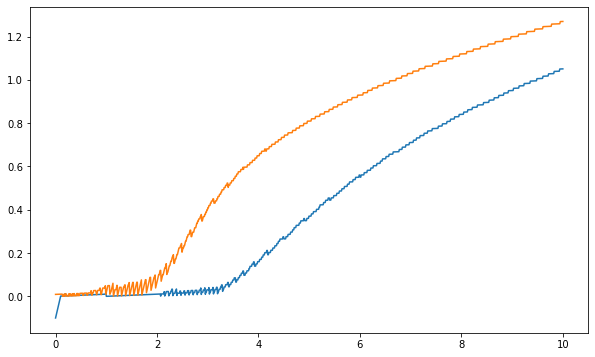

In [7]:
plt.figure(figsize = (10, 6))
plt.plot(k_grid, consumption_old.T)
plt.show()

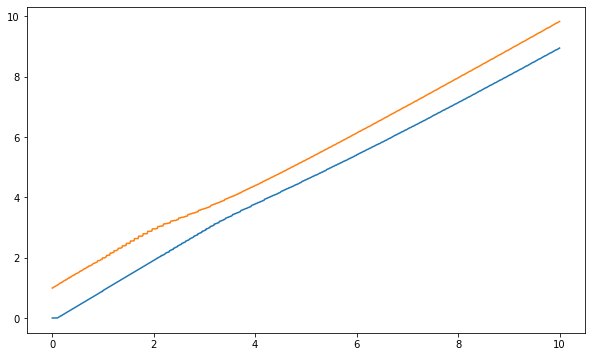

In [8]:
plt.figure(figsize = (10, 6))
plt.plot(k_grid, policy_old.T)
plt.show()